# Circuit Scaling

In [1]:
import pennylane as qml
from pennylane import numpy as np
from Pauli_algebra_v3 import *
import matplotlib.pyplot as plt
import itertools
from Random_QLSP_v7_light import *

In [2]:
def calc_klocality(pstr):
    return pstr.count('X') + pstr.count('Y') + pstr.count('Z')

In [7]:
kappa = 10
n = 10
dim = 2**n

error01_pauli = []

number_of_unitaries = []
number_of_expval = []

for p in np.linspace(4,100, 4):
    print(p)
    int_expval = []
    int_error001_pauli = []
    for _ in range(1):
        gate_set, coefficient_set, A = Random_QLSP_v7(n, kappa=kappa, algorithm='shadows', J=int(p), k_loc=1)
        b = [1/np.sqrt(dim) for i in range(dim)]
        list_of_string_observables, local_calc, norm_calc = create_operator_list(A_strings=gate_set, A_coeffs=coefficient_set)
            
        for idx, val in enumerate(list_of_string_observables):
            if val in list(local_calc.keys()) and val in list(norm_calc.keys()):
                if abs(local_calc[val]) < 1e-15 and abs(norm_calc[val]) < 1e-15:
                    list_of_string_observables.remove(val)
            elif val in list(local_calc.keys()):
                if abs(local_calc[val]) < 1e-15:
                    list_of_string_observables.remove(val)
            elif val in list(norm_calc.keys()):
                if abs(norm_calc[val]) < 1e-15:
                    list_of_string_observables.remove(val)
        
        int_expval.append(len(list_of_string_observables))
        
        n_terms = len(gate_set)
        n_op = len(list_of_string_observables)

        k_loc = 0
        for ob in list_of_string_observables:
            k_int = calc_klocality(ob)
            if k_int > k_loc:
                k_loc = k_int

        error_grid = [0.01]
        for error in error_grid:
            shadow_size_bound_pauli = int(np.ceil(np.log(n_op)*(3**k_loc)/error**2))
            if np.isclose(error,0.01):
                int_error001_pauli.append(shadow_size_bound_pauli)

    number_of_expval.append(np.mean(int_expval))
    error01_pauli.append(np.mean(int_error001_pauli))

np.save('number_of_expval',np.array(number_of_expval))
np.save('error01_pauli',np.array(error01_pauli))

4.0
36.0


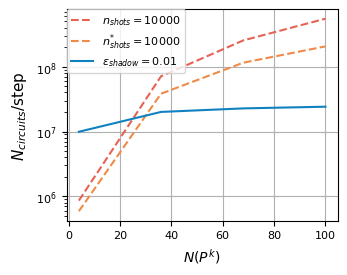

In [ ]:
error01_pauli = np.load('error01_pauli.npy')
number_of_expval = np.load('number_of_expval.npy')

number_of_unitaries = np.linspace(4,100, 4)
plt.figure(figsize=(3.5,2.75))

plt.plot(number_of_unitaries, [0.5*10000*(number_of_unitaries[i[0]]*(number_of_unitaries[i[0]] - 1) + 10*(number_of_unitaries[i[0]])**2) for i in enumerate(number_of_unitaries)],label=r'$n_{shots}=10000$', color= '#e76254', linestyle = 'dashed')
plt.plot(number_of_unitaries, 10000*np.array(number_of_expval), label = r'$n_{shots}^{*}=10000$', color = '#ef8a47', linestyle = 'dashed')   

plt.plot(number_of_unitaries, error01_pauli, label = r'$\epsilon_{shadow}=0.01$', color = '#1081C1')   

plt.xlabel(r'$N(P^k)$')
plt.ylabel(r'$N_{circuits}$/step', fontsize = 11, labelpad=12, va = 'center')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
# plt.ylim(-3e7,1e8)
plt.yscale("log")
plt.grid()
plt.legend(loc='upper left', borderaxespad=0, fontsize = 8, labelspacing = 0.35)#, ncol = 3)
plt.savefig('Operatorscaling_v2.pdf', bbox_inches = 'tight')

# Expval Scaling

In [2]:
import pennylane as qml
from pennylane import numpy as np
from Pauli_algebra_v3 import *
import matplotlib.pyplot as plt
import itertools
from Random_QLSP_v7_light import *

In [ ]:
def prune_list(list_of_string_observables, local_calc, norm_calc):
    for idx, val in enumerate(list_of_string_observables):
        if val in list(local_calc.keys()) and val in list(norm_calc.keys()):
            if abs(local_calc[val]) < 1e-15 and abs(norm_calc[val]) < 1e-15:
                list_of_string_observables.remove(val)
        elif val in list(local_calc.keys()):
            if abs(local_calc[val]) < 1e-15:
                list_of_string_observables.remove(val)
        elif val in list(norm_calc.keys()):
            if abs(norm_calc[val]) < 1e-15:
                list_of_string_observables.remove(val)
    return list_of_string_observables

In [ ]:
kappa = 10
n = 10
dim = 2**n

number_of_expval_k2 = []
number_of_expval_k4 = []

std_k2 = []
std_k4 = []

number_of_unitaries = []

for p in np.linspace(4,100,5):
    print(p)
    number_of_unitaries.append(p)

    int_list_2 = []
    int_list_4 = []

    for _ in range(1):
        gate_set_2, coefficient_set_2, A_2 = Random_QLSP_v7(n, kappa=kappa, algorithm='shadows', J=p, k_loc=1)
        list_of_string_observables_2, local_calc_2, norm_calc_2 = create_operator_list(A_strings=gate_set_2, A_coeffs=coefficient_set_2)
        pruned_list_2 = prune_list(list_of_string_observables_2, local_calc_2, norm_calc_2)
        int_list_2.append(len(pruned_list_2))

        gate_set_4, coefficient_set_4, A_4 = Random_QLSP_v7(n, kappa=kappa, algorithm='shadows', J=p, k_loc=5)
        list_of_string_observables_4, local_calc_4, norm_calc_4 = create_operator_list(A_strings=gate_set_4, A_coeffs=coefficient_set_4)
        pruned_list_4 = prune_list(list_of_string_observables_4, local_calc_4, norm_calc_2)
        int_list_4.append(len(pruned_list_4))        
    
    number_of_expval_k2.append(np.mean(int_list_2))
    number_of_expval_k4.append(np.mean(int_list_4)) 

    std_k2.append(np.std(int_list_2))
    std_k4.append(np.std(int_list_4))

np.save(f'number_of_expval_k1_{kappa}kappa_{n}qubits', np.array(number_of_expval_k2))
np.save(f'number_of_expval_k5_{kappa}kappa_{n}qubits', np.array(number_of_expval_k4))

np.save(f'std_k1_{kappa}kappa', np.array(std_k2))
np.save(f'std_k5_{kappa}kappa', np.array(std_k4))

In [3]:
kappa = 10

number_of_unitaries = np.linspace(4,100,10)

number_of_expval_k2 = np.load(f'number_of_expval_k2_{kappa}kappa.npy')
number_of_expval_k4 = np.load(f'number_of_expval_k4_{kappa}kappa.npy')

std_k2 = np.load(f'std_k2_{kappa}kappa.npy')
std_k4 = np.load(f'std_k4_{kappa}kappa.npy')
std_k10 = np.load(f'std_k10_{kappa}kappa.npy')

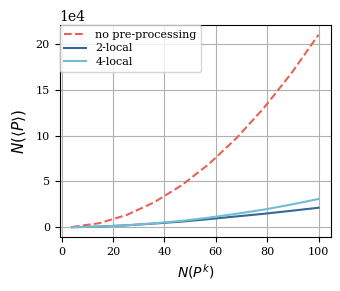

In [8]:
color = ['#aadce0',
 '#ef8a47',
 '#376795',
 '#f7aa58',
 '#72bcd5',
 '#ffe6b7',
 '#e76254',
 '#1e466e',
 '#ffd06f',
 '#528fad']

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Palatino",})

plt.figure(figsize=(3.5,2.75))

plt.plot(number_of_unitaries, [(number_of_unitaries[i[0]]*(number_of_unitaries[i[0]] - 1) + 20*(number_of_unitaries[i[0]])**2) for i in enumerate(number_of_unitaries)],label='no pre-processing', color= color[6], linestyle = 'dashed')
plt.plot(number_of_unitaries, number_of_expval_k2, label='2-local', color= color[2])
plt.plot(number_of_unitaries, number_of_expval_k4, label='4-local', color= color[4])
# plt.plot(number_of_unitaries, number_of_expval_k10, label='10-local', color= 'green')

plt.xlabel(r'$N(P^k)$')
plt.ylabel(r'$N(\langle P \rangle)$', fontsize = 11, labelpad=12, va = 'center', rotation = 'vertical')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
# plt.text(37,4.4e4,r'$\sim 11N_{P_i}^{2}$')
# plt.text(57,2.3e4,r'$\sim 2.9N_{P_i}^{2}$')
# plt.text(77,0.7e4,r'$\sim 1.4N_{P_i}^{2}$')
plt.grid()

plt.legend(loc='upper left', borderaxespad=0, fontsize = 8, labelspacing = 0.35)
# plt.savefig('Expvalscaling_v2.pdf', bbox_inches = 'tight')

# Qubit Scaling

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from classical_shadows_functions import *
from Pauli_algebra_v3 import *
import matplotlib.pyplot as plt
import itertools
from Random_QLSP_v7_light import *

In [ ]:
def prune_list(list_of_string_observables, local_calc, norm_calc):
    for idx, val in enumerate(list_of_string_observables):
        if val in list(local_calc.keys()) and val in list(norm_calc.keys()):
            if abs(local_calc[val]) < 1e-15 and abs(norm_calc[val]) < 1e-15:
                list_of_string_observables.remove(val)
        elif val in list(local_calc.keys()):
            if abs(local_calc[val]) < 1e-15:
                list_of_string_observables.remove(val)
        elif val in list(norm_calc.keys()):
            if abs(norm_calc[val]) < 1e-15:
                list_of_string_observables.remove(val)
    return list_of_string_observables

In [ ]:
kappa = 10
n_qubits = np.linspace(10,50,5)
n_unitaries = 10
number_of_expval_k2 = []
number_of_expval_half = []

std_k2 = []
std_half = []

for nq in n_qubits:
    print(nq)
    int_list_2 = []
    int_list_half = []

    for _ in range(1):
        gate_set_2, coefficient_set_2, A_2 = Random_QLSP_v7(int(nq), kappa=kappa, algorithm='shadows', J=n_unitaries, k_loc=2)
        list_of_string_observables_2, local_calc_2, norm_calc_2 = create_operator_list(A_strings=gate_set_2, A_coeffs=coefficient_set_2)
        pruned_list_2 = prune_list(list_of_string_observables_2, local_calc_2, norm_calc_2)
        int_list_2.append(len(pruned_list_2))

        gate_set_half, coefficient_set_half, A_half = Random_QLSP_v7(int(nq), kappa=kappa, algorithm='shadows', J=n_unitaries, k_loc=int(nq/2))
        list_of_string_observables_half, local_calc_half, norm_calc_half = create_operator_list(A_strings=gate_set_half, A_coeffs=coefficient_set_half)
        pruned_list_half = prune_list(list_of_string_observables_half, local_calc_half, norm_calc_half)
        int_list_half.append(len(pruned_list_half))        
    
    number_of_expval_k2.append(np.mean(int_list_2))
    number_of_expval_half.append(np.mean(int_list_half)) 

    std_k2.append(np.std(int_list_2))
    std_half.append(np.std(int_list_half))


np.save(f'number_of_expval_k2_{n_unitaries}unitaries_nqubits', np.array(number_of_expval_k2))
np.save(f'number_of_expval_half_{n_unitaries}unitaries_nqubits', np.array(number_of_expval_half))

np.save(f'std_k2_{n_unitaries}unitaries_nqubits', np.array(std_k2))
np.save(f'std_half_{n_unitaries}unitaries_nqubits', np.array(std_half))

In [ ]:
n_unitaries = 10

n_qubits = np.linspace(10,50,5)

number_of_expval_k2 = np.load(f'number_of_expval_k2_{n_unitaries}unitaries_nqubits.npy')
number_of_expval_half = np.load(f'number_of_expval_half_{n_unitaries}unitaries_nqubits.npy')

std_k2 = np.load(f'std_k2_{n_unitaries}unitaries_nqubits.npy')
std_half = np.load(f'std_half_{n_unitaries}unitaries_nqubits.npy')

In [ ]:
color = ['#aadce0',
 '#ef8a47',
 '#376795',
 '#f7aa58',
 '#72bcd5',
 '#ffe6b7',
 '#e76254',
 '#1e466e',
 '#ffd06f',
 '#528fad']

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.sans-serif": "Palatino",})

plt.figure(figsize=(3.5,2.75))

plt.plot(n_qubits, [(n_unitaries*(n_unitaries - 1) + nq*(n_unitaries)**2) for nq in n_qubits],label='no pre-processing', color= color[6], linestyle = 'dashed')
plt.plot(n_qubits, number_of_expval_k2, label=r'2-local', color= color[2])
plt.plot(n_qubits, number_of_expval_half, label=r'n/2-local', color= color[4])

plt.xlabel(r'$n$')
plt.ylabel(r'$N_{\langle P_i \rangle}$', fontsize = 11, labelpad=12, va = 'center', rotation = 'horizontal')
plt.ticklabel_format(axis='y', style='sci', scilimits=(1,2))
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.grid()

plt.legend(loc='upper left', borderaxespad=0, fontsize = 8, labelspacing = 0.35)
# plt.savefig('Expvalscaling_v2.pdf', bbox_inches = 'tight')

# Time Scaling